# Nonlinear regression

Nonlinear regression is a multi-variable optimization problem. The objective is to minimize the overall regression error to find the regression constants. This can be done using the python `fmin` function as shown in the example below. 

These are the important steps:

1. Prepare a function to calculate the total regression error. This function contains your regression curve.
2. Write a lambda function to the function in step 1.
3. Pass the lambda function from step 2 to `fmin` to do the minimization and return the regression constants.
4. Calculate $r^2$ and $S_{y/x}$ and plot the regression curve along with the data to assess the quality of the fit.

For details see the example below. Note how these steps are implemented and how the data is passed to `fmin` as input aurguments.


## Example

Use the nonlinear regression to fits the function $F=a_0 v^{a_1}$ to the following data points to find $a_0$ and $a_1$. Plot the regression line along wih the data. Calculate $r^2$. Check the $r^2$ and the plot to decide whether the curve is the right fit for the data or not.

| $v$ |  10 | 20| 30 | 40 | 50 | 60 | 70 | 80 | 
|---|---|---|---|---|---|---|---|---|
| $F$ | 25 | 70 | 380 | 550 | 610 | 1220 | 830 | 1450

Optimization terminated successfully.
         Current function value: 222604.848439
         Iterations: 84
         Function evaluations: 162
Regression parameters: a= [2.53842496 1.43585073]


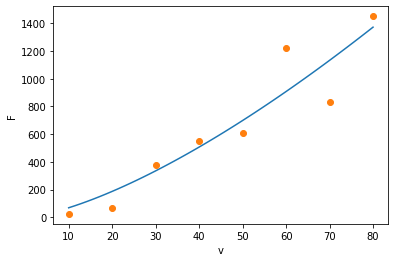

r2 =  0.8768980627482308
The curve (F= 2.53842495869998  * v** 1.4358507347585587 ) represent the data reasonably well.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def sr_func(a, x, y):
  """
  Calculates the total regression error

  sr_func(a, x, y)
  Returns the total regression error
  Input:
    a: array of regression parameters
    x : the independant variable data
    y : the dependant variable data
  Output:
    sr: total regression error
  """    
  y_reg = a[0] * x**a[1]       # regression function: F = a0 * v**a1
  sr = np.sum((y - y_reg)**2)  # total regression error
  return sr



v = np.array([10.,20.,30.,40., 50., 60., 70., 80.])
F = np.array([25., 70., 380., 550., 610., 1220., 830., 1450.])
f = lambda a1, v1, F1: sr_func(a1, v1, F1)  # v1 and F1 are lambda function variables corresponding to v and F data;
                                            # these are used by fmin to pass the data to the sr_func function
                                            # a1 lambda function variable corresponds to a (array of regression constants)

a0 = [1,1]  # inital guess for "a" array (consistent with the shape of a)

# - fmin is used for multi-variate optimization to minimize the total regression error
# - f is a lambda function to the sr_func which returns the total regression error
# - a0 is the initial guess which is consistent with the shape of a
# - the data v, F are passed to fmin as tuples using the args input aurgument
#    fmin passes these parameters to the lambda function which then
#    passes them to our sr_func function. The order in which 
#    the data is passed is important. Here, we consistently passed v and then F to all functions.
# - fmin returns "a" that is the array of regression parameters
a = fmin(f, a0, args=(v, F), xtol = 1e-6) 

print('Regression parameters: a=', a)
# Creating the plot
vp = np.linspace(np.min(v),np.max(v))  # generating v and F with higher resolution to plot
Fp = a[0] * vp**a[1]
plt.plot(vp,Fp,'-')
plt.plot(v,F,'o')
plt.xlabel('v')
plt.ylabel('F')
plt.show();
# Calculating r2
Sr = sr_func(a, v, F)
St = np.sum((F - np.mean(F))**2)
r2 = (St-Sr)/St
print('r2 = ', r2)
print('The curve (F=',a[0],' * v**',a[1], ') represent the data reasonably well.')

# Exercise

Fit the function $y = a_0(1-e^{-a_1 x})$ to the following data and evaluate the quality of the curve fitting.

x|0.25 | 0.75| 1.25| 1.75| 2.25|
-| --- | --- | --- | --- | --- |
y|0.28| 0.57| 0.68| 0.74| 0.79|
